In [30]:
%matplotlib inline


Fit Multiple Data Sets
======================

Fitting multiple (simulated) Gaussian data sets simultaneously.

All minimizers require the residual array to be one-dimensional. Therefore, in
the ``objective`` we need to ``flatten`` the array before returning it.

TODO: this should be using the Model interface / built-in models!


In [31]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Parameters, minimize, report_fit


def gauss(x, amp, cen, sigma):
    """Gaussian lineshape."""
    return amp * np.exp(-(x-cen)**2 / (2.*sigma**2))


def gauss_dataset(params, i, x):
    """Calculate Gaussian lineshape from parameters for data set."""
    amp = params['amp_%i' % (i+1)]
    cen = params['cen_%i' % (i+1)]
    sig = params['sig_%i' % (i+1)]
    return gauss(x, amp, cen, sig)


def objective(params, x, data):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = data.shape
    resid = 0.0*data[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = data[i, :] - gauss_dataset(params, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()

Create five simulated Gaussian data sets



In [32]:
x = np.linspace(-1, 2, 151)
data = []
for i in np.arange(5):
    params = Parameters()
    amp = 0.60 + 9.50*np.random.rand()
    cen = -0.20 + 1.20*np.random.rand()
    sig = 0.25 + 0.03*np.random.rand()
    dat = gauss(x, amp, cen, sig) + np.random.normal(size=x.size, scale=0.1)
    data.append(dat)
data = np.array(data)

Create five sets of fitting parameters, one per data set



In [33]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('cen_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

Constrain the values of sigma to be the same for all peaks by assigning
sig_2, ..., sig_5 to be equal to sig_1.



In [38]:
for iy in (2, 3, 4, 5):
    fit_params['sig_%i' % iy].expr = 'sig_1'

display(fit_params)    

name,value,initial value,min,max,vary,expression
amp_1,0.50000000,0.5,0.00000000,200.000000,True,
cen_1,0.40000000,0.4,-2.00000000,2.00000000,True,
sig_1,0.30000000,0.3,0.01000000,3.00000000,True,
amp_2,0.50000000,0.5,0.00000000,200.000000,True,
cen_2,0.40000000,0.4,-2.00000000,2.00000000,True,
sig_2,0.30000000,0.3,0.01000000,3.00000000,False,sig_1
amp_3,0.50000000,0.5,0.00000000,200.000000,True,
cen_3,0.40000000,0.4,-2.00000000,2.00000000,True,
sig_3,0.30000000,0.3,0.01000000,3.00000000,False,sig_1
amp_4,0.50000000,0.5,0.00000000,200.000000,True,


Run the global fit and show the fitting result



In [35]:
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

[[Variables]]
    amp_1:  1.08097445 +/- 0.02499777 (2.31%) (init = 0.5)
    cen_1:  0.98821030 +/- 0.00852982 (0.86%) (init = 0.4)
    sig_1:  0.26113769 +/- 5.9982e-04 (0.23%) (init = 0.3)
    amp_2:  5.00812776 +/- 0.02562085 (0.51%) (init = 0.5)
    cen_2: -0.08208583 +/- 0.00184112 (2.24%) (init = 0.4)
    sig_2:  0.26113769 +/- 5.9982e-04 (0.23%) == 'sig_1'
    amp_3:  8.36082907 +/- 0.02674970 (0.32%) (init = 0.5)
    cen_3:  0.34719513 +/- 0.00110282 (0.32%) (init = 0.4)
    sig_3:  0.26113769 +/- 5.9982e-04 (0.23%) == 'sig_1'
    amp_4:  7.78509200 +/- 0.02651956 (0.34%) (init = 0.5)
    cen_4:  0.15003934 +/- 0.00118438 (0.79%) (init = 0.4)
    sig_4:  0.26113769 +/- 5.9982e-04 (0.23%) == 'sig_1'
    amp_5:  8.91877489 +/- 0.02698632 (0.30%) (init = 0.5)
    cen_5:  0.91813249 +/- 0.00103383 (0.11%) (init = 0.4)
    sig_5:  0.26113769 +/- 5.9982e-04 (0.23%) == 'sig_1'
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_1, amp_5) = -0.380
    C(sig_1, amp_3) = -0.

Plot the data sets and fits



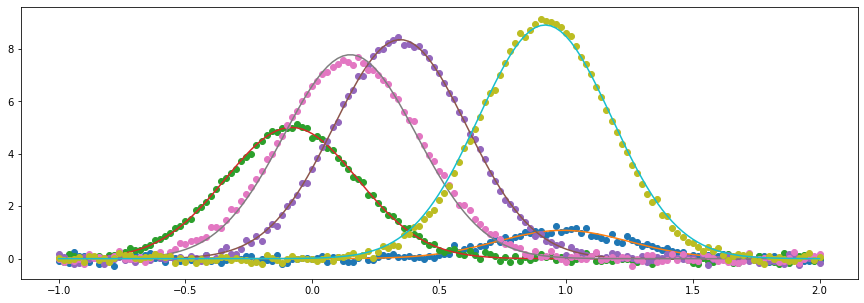

In [37]:
plt.figure(figsize=(15,5))
for i in range(5):
    y_fit = gauss_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()